In [87]:
# Load Exploratory Data Analysis packages
import pandas as pd
import numpy as np

In [88]:
# Loading the data visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt


In [89]:
# Packaage for cleaning the text
import neattext.functions as nfx

In [90]:
# Loading machine learning Packages
# # Machine learning Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Machine learning Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [119]:
# Load Dataset
data = pd.read_csv("emotion_dataset_raw.csv")

In [120]:
# To get the first five observations
data.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [121]:
data.shape

(34792, 2)

In [122]:
data.dtypes

Emotion    object
Text       object
dtype: object

In [123]:
data.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [124]:
# Value Counts of the emotion column
data['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:>

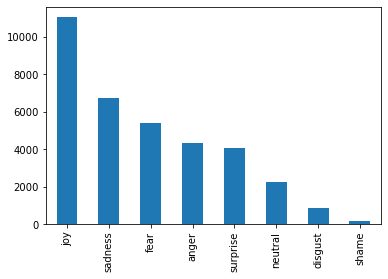

In [125]:
data['Emotion'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='Emotion', ylabel='count'>

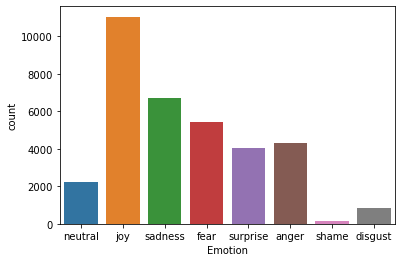

In [126]:
# Plot of the emotion column
sns.countplot(x='Emotion',data=data)

In [127]:
##Sentiment Analysis

In [128]:
##Sentiment Analysis
from textblob import TextBlob

In [129]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result =  'Positive'
    elif sentiment < 0:
        result = 'Negative'
    else:
        result = 'Neutral'
        
    return result

In [130]:
get_sentiment('I hate snake')

'Negative'

In [131]:
data['Sentiment'] = data['Text'].apply(get_sentiment)

In [132]:
#comparing emotions with sentiment

In [133]:
data.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      325
          Neutral       249
          Positive      282
fear      Negative     1534
          Neutral      1843
          Positive     2033
joy       Negative     1682
          Neutral      3648
          Positive     5715
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2630
          Neutral      2127
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1545
          Positive     1894
dtype: int64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


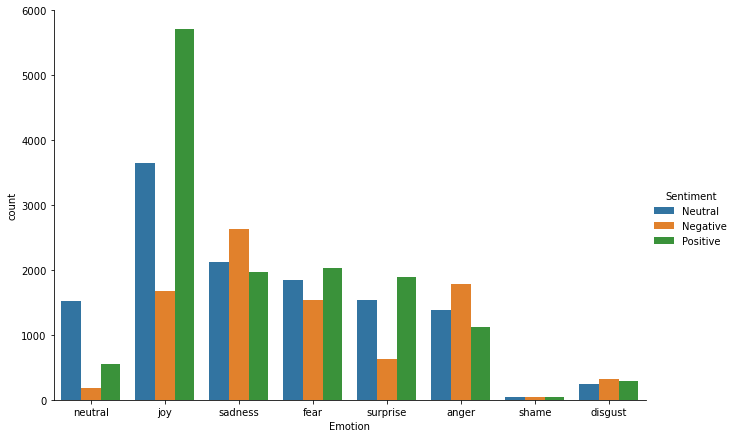

In [134]:
sns.factorplot(x='Emotion',hue ='Sentiment',data =data,kind ='count',size =6,aspect =1.5)

In [135]:
#keyword Extraction

In [136]:
#Remove noise like stopwords,special character,emojis,punctuations using neattext


In [137]:
# Removing Stopwords from clean column
data['Clean_Text'] = data['Text'].apply(nfx.remove_stopwords)

In [138]:
# Removing punctuations  from clean column
data['Clean_Text'] = data['Clean_Text'].apply(nfx.remove_punctuations)

In [139]:
# Remove user handles by creating new column named clean text
data['Clean_Text'] = data['Clean_Text'].apply(nfx.remove_userhandles)

In [140]:
#keyword extraction to extract to extract the commonest words

In [141]:
from collections import Counter

In [147]:
def extract_keywords(text,num=50):
    tokens = [tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [148]:
emotion_list = data['Emotion'].unique().tolist()
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [149]:
joy_list = data[data['Emotion'] =='joy']['Clean_Text'].tolist()

In [150]:
joy_list

['Sage Act upgrade list tommorow',
 'eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness ',
 '  ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang',
 'life  Leopold truly happy : hopes prayers beloved son come fruition ',
 'feeling fail french #fuckfrench',
 'GoodLet  ',
 'fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhile',
 'terribly ecstatic dangerous thing ',
 'selected study university',
 'Yeah  ’ ages  ',
 'passed BA exams class results',
 'heard selected fot year university Zambia form Chikola secondary school',
 'Welp time study days',
 'Heading campus rain grad photos',
 'feeling awesome ',
 '  brings  Ive bought Christmas presents trawl loads shops :)',
 'shit pants Pure 100% gravy',
 'life  Leopold

In [151]:
joy_docx = ''.join(joy_list)
joy_docx

'Sage Act upgrade list tommoroweye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness   ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko anglife  Leopold truly happy : hopes prayers beloved son come fruition feeling fail french #fuckfrenchGoodLet  fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhileterribly ecstatic dangerous thing selected study universityYeah  ’ ages  passed BA exams class resultsheard selected fot year university Zambia form Chikola secondary schoolWelp time study daysHeading campus rain grad photosfeeling awesome   brings  Ive bought Christmas presents trawl loads shops :)shit pants Pure 100% gravylife  Leopold truly happy : hopes prayers beloved son come fruition Class jamming paper quarter rea

In [152]:
#Extract keywords

In [155]:
keyword_joy = extract_keywords(joy_docx)
keyword_joy

{'amp': 652,
 'day': 582,
 'time': 468,
 'Im': 453,
 'like': 439,
 'work': 400,
 'Christmas': 370,
 'today': 318,
 'good': 312,
 'tomorrow': 304,
 'happy': 303,
 'love': 283,
 'going': 283,
 'night': 250,
 'got': 248,
 'home': 248,
 'school': 233,
 '2': 232,
 'morning': 225,
 'joy': 214,
 'life': 208,
 'hours': 201,
 'feel': 193,
 'year': 183,
 'people': 179,
 'long': 178,
 's': 176,
 'new': 172,
 'great': 168,
 'days': 166,
 'week': 163,
 'sleep': 158,
 'know': 158,
 'family': 157,
 'RT': 156,
 'hour': 152,
 'God': 143,
 ':)': 143,
 'cant': 137,
 'excited': 135,
 'tonight': 134,
 'friends': 128,
 'feeling': 126,
 'felt': 126,
 'friend': 126,
 'right': 124,
 '3': 123,
 'old': 121,
 'me': 121,
 'think': 119}

In [162]:
def plot_most_common_words(mydict):
    df_01 = pd.DataFrame(mydict.items(),columns= ['token','count'])
    plt.figure(figsize=(20,10))
    sns.barplot(x='token',y='count',data=df_01)
    plt.xticks(rotation=45)
    plt.show()

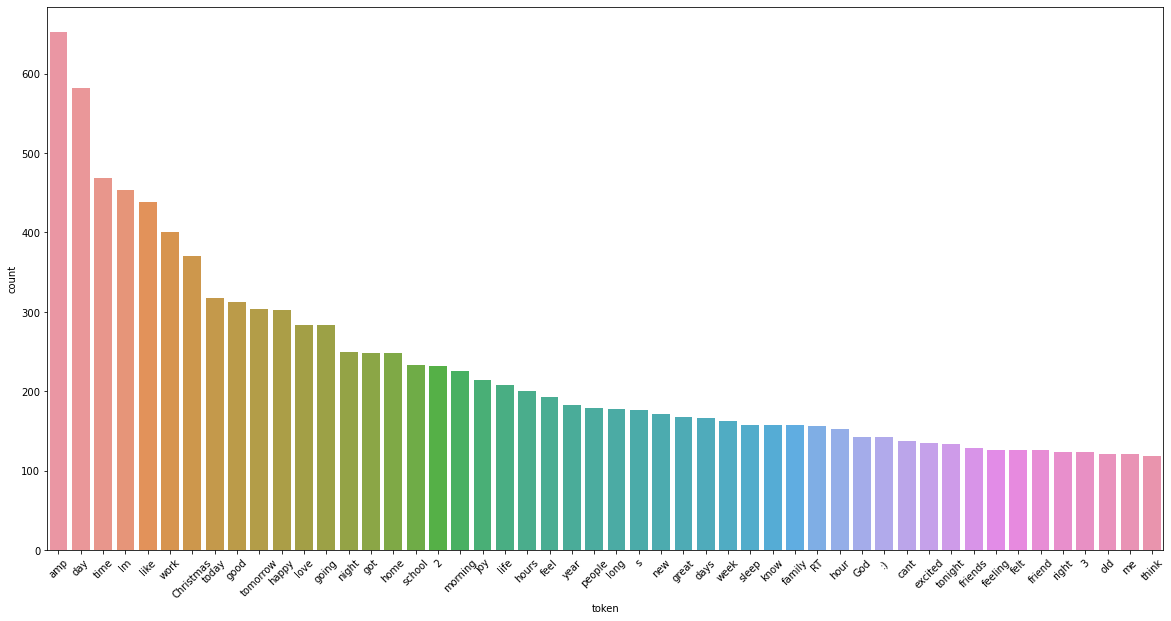

In [163]:
plot_most_common_words(keyword_joy)

In [164]:
from wordcloud import WordCloud

In [170]:
def plot_wordcloud(docx):
    mywordCloud = WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordCloud,interpolation = 'bilinear')
    plt.axis('off')
    plt.show()
    

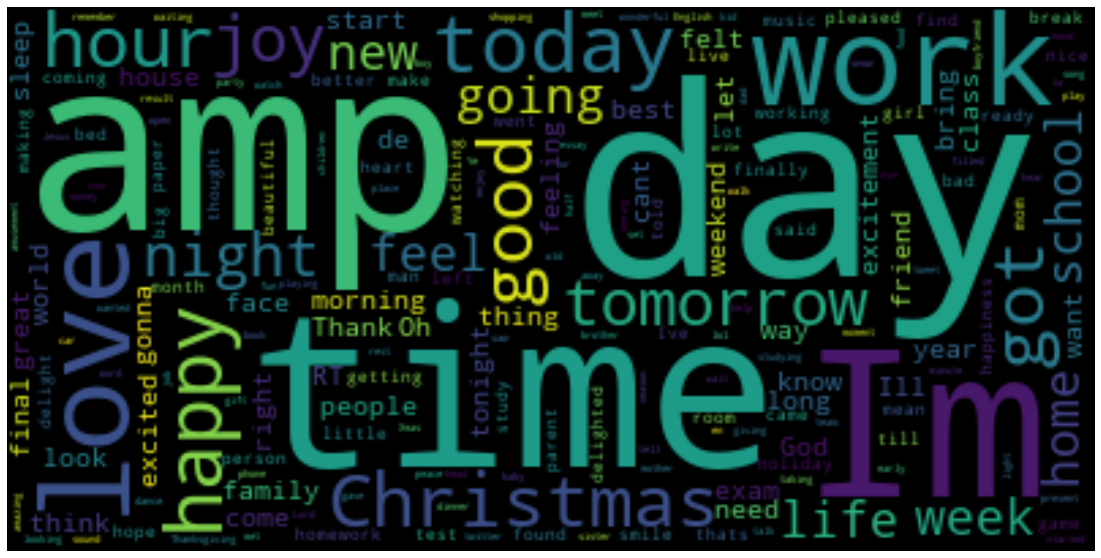

In [171]:
plot_wordcloud(joy_docx)

In [9]:
# Everything in nfx 
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [11]:
#MACHINE LEARNING

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [175]:
from sklearn.model_selection import train_test_split

In [178]:
X = data['Clean_Text']
y= data['Emotion']

In [180]:
cv =CountVectorizer()
X = cv.fit_transform(X)

In [182]:
cv.get_feature_names()

['00',
 '000',
 '000ème',
 '0021',
 '00am',
 '00pm',
 '01',
 '0235299130',
 '0330',
 '0400',
 '045',
 '05',
 '0512',
 '06',
 '073',
 '0798765',
 '08',
 '0800',
 '09',
 '099b8',
 '0l',
 '0ntworpen',
 '0o',
 '0oquot',
 '0w',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100000yr',
 '10000th',
 '1000gifts',
 '1000s',
 '1000shs',
 '1000th',
 '100s',
 '100th',
 '101',
 '1010',
 '1015',
 '101quot',
 '102',
 '1021',
 '1022',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '10373629',
 '104',
 '1040',
 '105',
 '106',
 '1080',
 '10am',
 '10ans',
 '10h',
 '10hrs',
 '10k',
 '10mins',
 '10pm',
 '10puntos',
 '10ritengono',
 '10th',
 '10x',
 '10year',
 '10years',
 '10yrolds',
 '11',
 '110',
 '1100pm',
 '1104',
 '110km',
 '111',
 '1111ème',
 '112',
 '1130',
 '115',
 '1162',
 '118',
 '11am',
 '11hour',
 '11months',
 '11pm',
 '11yr',
 '12',
 '120',
 '1200',
 '121',
 '12181',
 '122',
 '122511',
 '123',
 '1230',
 '125',
 '1250',
 '12521260',
 '128',
 '128600',
 '1295',
 '12days',
 '12hours',
 '12hr',
 '12hrstwi

In [184]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3,random_state = 42)

In [ ]:
nv_model = MultinomialNB()


In [22]:
# Keyword Extraction
# Extract most commones words per class of emotion

In [23]:
from collections import Counter

In [ ]:
def extract_keywords(text):
    tokens = [tok for token in text.split()]
    most_common_tokens = Counter(tokens).most_common(num) 

In [13]:
#Extracting the features and the label
X = data['Clean_Text']
y = data['Emotion']

In [14]:
# Splitting the dataset into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [15]:
# Build Pipeline for the CountVectorizer and the machine learning algorithm
from sklearn.pipeline import Pipeline

In [16]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [17]:
# Training  and Fiting the  Data
pipe_lr.fit(X_train,y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [18]:
# Checking the model accuracy
pipe_lr.score(X_test,y_test)

0.622341444721211

In [19]:
# Test and make some prediction
example1 = "I hate her"

In [20]:
pipe_lr.predict([example1])

array(['anger'], dtype=object)

In [21]:
# Prediction Probability
pipe_lr.predict_proba([example1])

array([[0.29453287, 0.10030108, 0.17327031, 0.07378591, 0.05143542,
        0.26279984, 0.00266665, 0.04120793]])